# The Harmonic Oscillator Strikes Back

*Note:* Much of this is adapted/copied from https://flothesof.github.io/harmonic-oscillator-three-methods-solution.html

This week we continue our adventures with the harmonic oscillator.

![1D Harmonic Oscillator](ho.png) 

The harmonic oscillator is a system that, when displaced from its equilibrium position, experiences a restoring force F proportional to the displacement x:

$$F=-kx$$

The potential energy of this system is 

$$V = {1 \over 2}k{x^2}$$

These are sometime rewritten as

$$ F=- \omega_0^2 m x, \text{ }  V(x) = {1 \over 2} m \omega_0^2 {x^2}$$

Where $\omega_0  = \sqrt {{k \over m}} $

If the equilibrium value of the harmonic oscillator is not zero, then 

$$ F=- \omega_0^2 m (x-x_{eq}), \text{ }  V(x) = {1 \over 2} m \omega_0^2 (x-x_{eq})^2$$

## 1. Harmonic oscillator from last time (with some better defined conditions)

Applying the harmonic oscillator force to Newton's second law leads to the following second order differential equation

$$ F = m a $$

$$ F= -m \omega_0^2 (x-x_{eq}) $$

$$ a = - \omega_0^2 (x-x_{eq}) $$

$$ x(t)'' = - \omega_0^2 (x-x_{eq}) $$

The final expression can be rearranged into a second order homogenous differential equation, and can be solved using the methods we used above

This is already solved to remind you how we found these values

In [25]:
import sympy as sym
sym.init_printing()

**Note** that this time we define some of the properties of the symbols. Namely, that the frequency is always positive and real and that the positions are always real

In [26]:
omega0,t=sym.symbols("omega_0,t",positive=True,nonnegative=True,real=True)
xeq=sym.symbols("x_{eq}",real=True)
x=sym.Function("x",real=True)
x(t),omega0

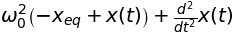

In [27]:
dfeq=sym.Derivative(x(t),t,2)+omega0**2*(x(t)-xeq)
dfeq

In [28]:
sol = sym.dsolve(dfeq)
sol

In [29]:
sol,sol.args[0],sol.args[1]

**Note** this time we define the initial positions and velocities as real

In [30]:
x0,v0=sym.symbols("x_0,v_0",real=True)
ics=[sym.Eq(sol.args[1].subs(t, 0), x0),
     sym.Eq(sol.args[1].diff(t).subs(t, 0), v0)]
ics

In [31]:
solved_ics=sym.solve(ics)
solved_ics

### 1.1 Equation of motion for $x(t)$

In [32]:
full_sol = sol.subs(solved_ics[0])
full_sol

### 1.2 Equation of motion for $p(t)$

In [33]:
m=sym.symbols("m",positive=True,nonnegative=True,real=True)
p=sym.Function("p")
sym.Eq(p(t),m*sol.args[1].subs(solved_ics[0]).diff(t))

## 2. Time average values for a harmonic oscillator

If we want to understand the average value of a time dependent observable, we need to solve the following integral


$${\left\langle {A(t)} \right\rangle}_t  = \begin{array}{*{20}{c}}
{\lim }\\
{\tau  \to 0}
\end{array}\frac{1}{\tau }\int\limits_0^\tau  {A(t)dt} $$

### 2.1 Average position ${\left\langle {x} \right\rangle}_t$ for a harmonic oscillator

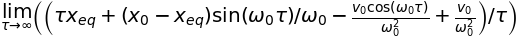

In [34]:
tau=sym.symbols("tau",nonnegative=True,real=True)
xfunc=full_sol.args[1]
xavet=(xfunc.integrate((t,0,tau))/tau).limit(tau,sym.oo)
xavet

The computer does not always make the best choices the first time. If you treat each sum individually this is not a hard limit to do by hand. The computer is not smart. We can help it by inseting an `expand()` function in the statement

In [35]:
xavet=(xfunc.integrate((t,0,tau))/tau).expand().limit(tau,sym.oo)
xavet

### 2.2 Excercise: Calculate the average momenta  ${\left\langle {p} \right\rangle}_t$ for a harmonic oscillator

In [36]:
m=sym.symbols("m",positive=True,nonnegative=True,real=True)
p=sym.Function("p")
sym.Eq(p(t),m*sol.args[1].subs(solved_ics[0]).diff(t))

In [37]:
tau=sym.symbols("tau",nonnegative=True,real=True)
pfunc=sym.Eq(p(t),m*sol.args[1].subs(solved_ics[0]).diff(t)).args[1]
pavet=(pfunc.integrate((t,0,tau))/tau).limit(tau,sym.oo)
pavet

### 2.3 Exercise: Calculate the average kinetic energy of a harmonic oscillator

In [38]:
kefunct=((sym.Eq(p(t),m*sol.args[1].subs(solved_ics[0]).diff(t)).args[1])**2/(2*m))
kefunct

In [39]:
keavt=(kefunct.integrate((t,0,tau))/tau).expand().limit(tau,sym.oo)
keavt

## 3.  Ensemble (Thermodynamic) Average values for a harmonic oscillator

If we want to understand the thermodynamics ensemble average value of an observable, we need to solve the following integral. 


$${\left\langle {A(t)} \right\rangle}_{T}  = \frac{\int{A e^{-\beta H}dqdp}}{\int{e^{-\beta H}dqdp} } $$

You can think of this as a Temperature average instead of a time average.

Here $\beta=\frac{1}{k_B T}$ and the classical Hamiltonian, $H$ is

$$ H = \frac{p^2}{2 m} + V(q)$$

**Note** that the factors of $1/h$ found in the classical partition function cancel out when calculating average values

### 3.1 Average position ${\left\langle {x} \right\rangle}_t$ for a harmonic oscillator

For a harmonic oscillator with equilibrium value $x_{eq}$, the Hamiltonian is 
$$ H = \frac{p^2}{2 m} + \frac{1}{2} m \omega_0 (x-x_{eq})^2 $$

First we will calculate the partition function $\int{e^{-\beta H}dqdp}$

In [40]:
k,T=sym.symbols("k,T",positive=True,nonnegative=True,real=True)
xT,pT=sym.symbols("x_T,p_T",real=True)
ham=sym.Rational(1,2)*(pT)**2/m + sym.Rational(1,2)*m*omega0**2*(xT-xeq)**2
beta=1/(k*T)
bolz=sym.exp(-beta*ham)
z=sym.integrate(bolz,(xT,-sym.oo,sym.oo),(pT,-sym.oo,sym.oo))
z

Then we can calculate the numerator $\int{A e^{-\beta H}dqdp}$


In [41]:
numx=sym.integrate(xT*bolz,(xT,-sym.oo,sym.oo),(pT,-sym.oo,sym.oo))
numx

And now the average value

In [42]:
xaveT=numx/z
xaveT

### 3.2 Exercise: Calculate the average momenta  ${\left\langle {p} \right\rangle}_t$ for a harmonic oscillator

After calculating the value, explain why you think you got this number 

In [43]:
k,T=sym.symbols("k,T",positive=True,nonnegative=True,real=True)
xT,pT=sym.symbols("x_T,p_T",real=True)
ham=sym.Rational(1,2)*(pT)**2/m + sym.Rational(1,2)*m*omega0**2*(xT-xeq)**2
beta=1/(k*T)
bolz=sym.exp(-beta*ham)
z=sym.integrate(bolz,(xT,-sym.oo,sym.oo),(pT,-sym.oo,sym.oo))
z

In [44]:
nump=sym.integrate(pT*bolz,(pT,-sym.oo,sym.oo),(xT,-sym.oo,sym.oo))
nump

In [45]:
paveT=nump/z
paveT

In [46]:
#zero makes sense because the momenta is constantly canceling out. It has a Guassian distrubtution and the mean value is zero.

### 3.3 Exercise: Calculate the average kinetic energy

The answer you get here is a well known result related to the energy equipartition theorem

In [47]:
k,T=sym.symbols("k,T",positive=True,nonnegative=True,real=True)
xT,pT=sym.symbols("x_T,p_T",real=True)
ham=sym.Rational(1,2)*(pT)**2/m + sym.Rational(1,2)*m*omega0**2*(xT-xeq)**2
beta=1/(k*T)
bolz=sym.exp(-beta*ham)
z=sym.integrate(bolz,(xT,-sym.oo,sym.oo),(pT,-sym.oo,sym.oo))
z

In [48]:
keaveT=sym.integrate(pT**2/(2*m)*bolz,(xT,-sym.oo,sym.oo),(pT,-sym.oo,sym.oo))/z
keaveT

# Back to the lecture

## 4. Exercise Verlet integrators

In this exercise we will write a routine to solve for the equations of motion for a hamonic oscillator.

Plot the positions and momenta (seprate plots) of the harmonic oscillator as a functions of time.

Calculaate trajectories using the following methods:
1. Exact solution
2. Simple taylor series expansion
3. Predictor-corrector method
4. Verlet algorithm
5. Leapfrog algorithm
6. Velocity Verlet algorithm

In [49]:
tau=sym.symbols("tau",nonnegative=True,real=True)
xfunc=full_sol.args[1]
xfunc

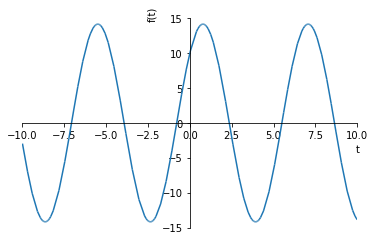

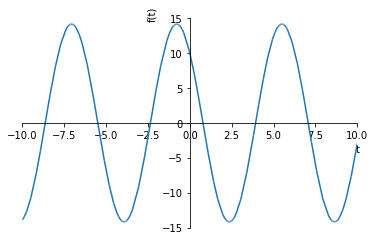

In [51]:
#1 Exact solution position
omega0,t=sym.symbols("omega_0,t",positive=True,nonnegative=True,real=True)
xeq=sym.symbols("x_{eq}",real=True)
x=sym.Function("x",real=True)
full_sol1 = sym.simplify(full_sol.subs({x0:10, xeq:0 , v0:10, omega0:1}))
sym.plot(full_sol1.rhs,(t,-10,10))
#1 momenta
m=sym.symbols("m",positive=True,nonnegative=True,real=True)
p=sym.Function("p")
sym.Eq(p(t),m*sol.args[1].subs(solved_ics[0]).diff(t))
momentum=sym.Eq(p(t),m*sol.args[1].subs(solved_ics[0]).diff(t))
momentum1=sym.simplify(momentum.subs({x0:10, xeq:0, v0:10, omega0:1, m:1}))
sym.plot(momentum1.rhs,(t,-10,10))

Text(0.5, 1.0, 'Taylor series approximation')

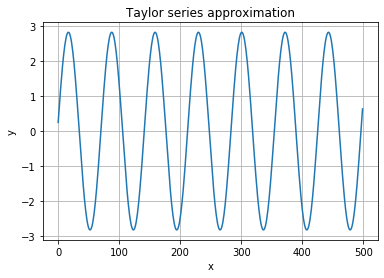

In [56]:
#2 Simple Taylor Series expansion
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
xt0=0
t=0.5
vt0=1
pos=[]
for i in range(0,100):
    vt=vt0+1/2*t**2*-xt0
    vt0=vt
    xt=xt0+vt0*t
    xt0=xt
    pos.append(xt)
plt.plot(xlist)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.title('Taylor series approximation')


In [ ]:
#3 skip

Text(0.5, 1.0, 'Verlet Algorithm-Position')

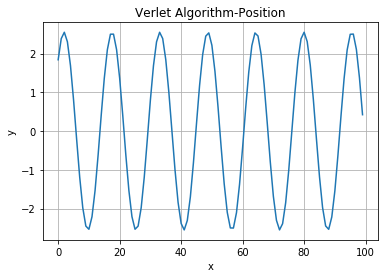

In [71]:
#4 Verlet algorithm
#r(t+dt)=2r(t)-r(t-dt)+dt**2*a
#v(t)=(r(t+dt)-r(t-dt))/2dt

import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
fig, (ax1, ax2) 

xt0=0
xt1=1
t=0.4
a=1
posit=[]
for i in range(0,100):
    xt2=2*xt1-xt0+t**2*(-(xt1))
    xt0=xt1
    xt1=xt2
    posit.append(xt2)
plt.plot(posit)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.title('Verlet Algorithm-Position')



Text(0.5, 1.0, 'Verlet Algorithm-Velocity')

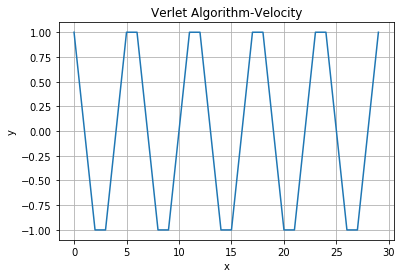

In [82]:
xt0=0
xt2=1
t=2
vel=[]
for i in range(0,30):
    vt=(xt2-xt0)/2*t
    xt0=xt2
    xt2=vt
    vel.append(vt)
plt.plot(vel)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.title('Verlet Algorithm-Velocity')

Text(0.5, 1.0, 'Leapfrog Alg-Position')

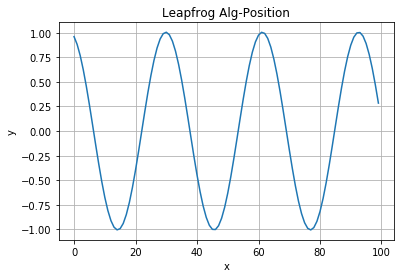

In [75]:
#5 Leapfrog 
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
xt0=1
vminushalft=0
t=0.2
posit=[]
for i in range(0,100):
    vhalft=vminushalft+(t)*(-(xt0))
    vminushalft=vhalft
    xt1=xt0+(t)*(vhalft)
    xt0=xt1
    posit.append(xt1)
plt.plot(posit)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.title('Leapfrog Alg Position')

Text(0.5, 1.0, 'Leapfrog Alg Velocity')

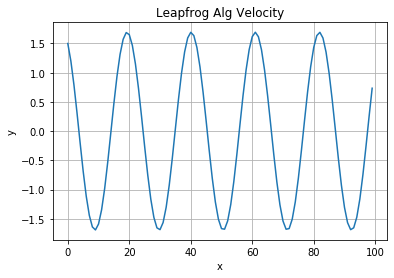

In [78]:
xt0=1
t=0.3
vminushalft=1
vhalft=2
vel=[]
for i in range(0,100):
    vt=(1/2)*((vhalft)+(vminushalft))
    vminushalft=vt
    vhalft=vminushalft+(t)*(-(xt0))
    vminushalft=vhalft
    xt1=xt0+(t)*(vhalft)
    xt0=xt1
    vel.append(vt)
plt.plot(vel)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.title('Leapfrog Alg Velocity')

Text(0.5, 1.0, 'Velocty Verlet Position')

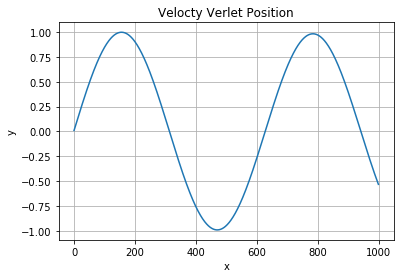

In [79]:
#velocity verlet algorithum

import sympy as sym
sym.init_printing()



dt=0.01
x0=0
v0=1
pos=[]
for i in range(0,1000):
    x1=x0+v0*dt+1/2*-x0*dt**2
    x0=x1
    v1=v0+1/2*(-x1-x0)*dt
    v0=v1
    pos.append(x1)
plt.plot(pos)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.title("Velocty Verlet Position")

Text(0.5, 1.0, 'Velocty Verlet Velocity')

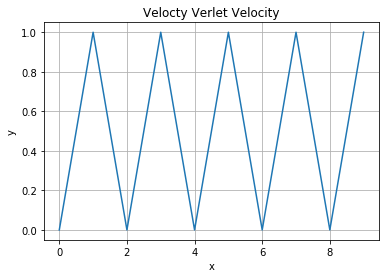

In [80]:
xt0=1
dt=2
vt0=1
vel=[]
for i in range(0,10):
    vtplushalfdt=vt0+1/2*dt*-xt0
    xt0=vtplushalfdt
    vel.append(vtplushalfdt)
plt.plot(vel)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.title("Velocty Verlet Velocity")